# Notebook to test basic functionality of spectral_binary tools

In [29]:
import spectral_binaries as sb

import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## testing of templates
Currently problematic as there are two different formats of templates available

### synthphot templates

In [2]:
#read single star spectra - synthphot
df = pd.read_hdf(sb.DATA_FOLDER+'single_spectra_with_synthphot.h5', key='singles')
#df= pd.read_hdf('../data/single_spectra.h5', key='singles')
print(list(df.columns))
print(df['WAVEGRID'])

['SOURCE_KEY', 'NAME', 'DESIGNATION', 'RA', 'DEC', 'DISCOVERY_REFERENCE', 'OPT_TYPE', 'OPT_TYPE_REF', 'NIR_TYPE', 'NIR_TYPE_REF', 'LIT_TYPE', 'LIT_TYPE_REF', 'OBJECT_TYPE', 'J_2MASS', 'J_2MASS_E', 'H_2MASS', 'H_2MASS_E', 'KS_2MASS', 'KS_2MASS_E', 'JK_EXCESS', 'COLOR_EXTREMITY', 'LUMINOSITY_CLASS', 'METALLICITY_CLASS', 'GRAVITY_CLASS_OPTICAL', 'GRAVITY_CLASS_OPTICAL_REF', 'GRAVITY_CLASS_NIR', 'GRAVITY_CLASS_NIR_REF', 'CLUSTER', 'CLUSTER_REF', 'LIBRARY', 'BINARY', 'BINARY_REF', 'SBINARY', 'SBINARY_REF', 'COMPANION_NAME', 'COMPANION_REF', 'SIMBAD_OTYPE', 'SIMBAD_NAME', 'SIMBAD_SPT', 'SIMBAD_SPT_REF', 'SIMBAD_SEP', 'PARALLAX', 'PARALLAX_E', 'PARALLEX_REF', 'DISTANCE_PHOT', 'DISTANCE_PHOT_E', 'DISTANCE', 'DISTANCE_E', 'MU', 'MU_E', 'MU_RA', 'MU_DEC', 'MU_REF', 'VTAN', 'VTAN_E', 'RV', 'RV_E', 'RV_REF', 'VSINI', 'VSINI_E', 'VSINI_REF', 'NOTE', 'SELECT', 'DATA_KEY', 'DATA_FILE', 'INSTRUMENT', 'OBSERVATION_DATE', 'OBSERVATION_TIME', 'JULIAN_DATE', 'PROGRAM_NUMBER', 'PROGRAM_PI', 'OBSERVER', 'RE

In [3]:
# have to drop a bunch of files - this needs to be fixed
print(len(df))
df = df.dropna(
    subset=[
        "WAVEGRID",
    ]
).reset_index(drop=True)
print(len(df))

# rename column while your at it
df.rename(columns={'WAVEGRID': 'WAVE', 'INTERP_FLUX': 'FLUX', 'INTERP_NOISE': 'UNC','SPTYPE_BY_STANDARD': 'SPT'},inplace=True)



1893
1781


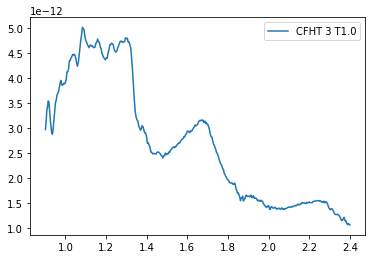

In [4]:
# access one of the spectra
wave = df['WAVE'].iloc[0]
ind = int(np.random.uniform(0,len(df)))
plt.plot(wave,df['FLUX'].iloc[ind])
plt.plot(wave,df['UNC'].iloc[ind])
plt.legend(['{} {}'.format(df['NAME'].iloc[ind],df['SPT'].iloc[ind])])


### "old" single templates

In [32]:
#read single star spectra 
df = pd.read_hdf(sb.DATA_FOLDER+'single_spectra.h5', key='singles')
print(list(df.columns))
print(df['wavegrid'])

['spectral_type', 'spex_type', 'opt_type', 'name', 'wavegrid', 'obs_date', 'system_interpolated_flux', 'system_interpolated_noise', 'difference_spectrum']
0      [0.90067, 0.904086, 0.907521, 0.910973, 0.9144...
1      [0.90067, 0.904086, 0.907521, 0.910973, 0.9144...
2      [0.90067, 0.904086, 0.907521, 0.910973, 0.9144...
3      [0.90067, 0.904086, 0.907521, 0.910973, 0.9144...
4      [0.90067, 0.904086, 0.907521, 0.910973, 0.9144...
                             ...                        
420    [0.90067, 0.904086, 0.907521, 0.910973, 0.9144...
421    [0.90067, 0.904086, 0.907521, 0.910973, 0.9144...
422    [0.90067, 0.904086, 0.907521, 0.910973, 0.9144...
423    [0.90067, 0.904086, 0.907521, 0.910973, 0.9144...
424    [0.90067, 0.904086, 0.907521, 0.910973, 0.9144...
Name: wavegrid, Length: 425, dtype: object


In [33]:
# nothing to drop

# rename column while your at it
df.rename(columns={'wavegrid': 'WAVE', 'system_interpolated_flux': 'FLUX', 'system_interpolated_noise': 'UNC','spectral_type': 'SPT', 'name': 'NAME'},inplace=True)


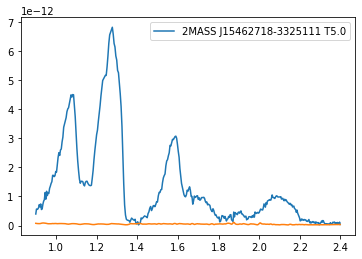

In [34]:
# access one of the spectra
wave = df['WAVE'].iloc[0]
ind = int(np.random.uniform(0,len(df)))
plt.plot(wave,df['FLUX'].iloc[ind])
plt.plot(wave,df['UNC'].iloc[ind])
plt.legend(['{} {}'.format(df['NAME'].iloc[ind],df['SPT'].iloc[ind])])


### spectral standards

In [35]:
#read single star spectra 
df = pd.read_hdf(sb.DATA_FOLDER+'standards.h5')
print(list(df.columns))
print(df['wavegrid'])

['interpolated_flux', 'interpolated_noise', 'name', 'sptype', 'wavegrid']
0     [0.90067, 0.904086, 0.907521, 0.910973, 0.9144...
1     [0.90067, 0.904086, 0.907521, 0.910973, 0.9144...
2     [0.90067, 0.904086, 0.907521, 0.910973, 0.9144...
3     [0.90067, 0.904086, 0.907521, 0.910973, 0.9144...
4     [0.90067, 0.904086, 0.907521, 0.910973, 0.9144...
                            ...                        
66    [0.90067, 0.904086, 0.907521, 0.910973, 0.9144...
67    [0.90067, 0.904086, 0.907521, 0.910973, 0.9144...
68    [0.90067, 0.904086, 0.907521, 0.910973, 0.9144...
69    [0.90067, 0.904086, 0.907521, 0.910973, 0.9144...
70    [0.90067, 0.904086, 0.907521, 0.910973, 0.9144...
Name: wavegrid, Length: 71, dtype: object


In [36]:
# nothing to drop

# rename column while your at it
df.rename(columns={'wavegrid': 'WAVE', 'interpolated_flux': 'FLUX', 'interpolated_noise': 'UNC','sptype': 'SPT', 'name': 'NAME'},inplace=True)



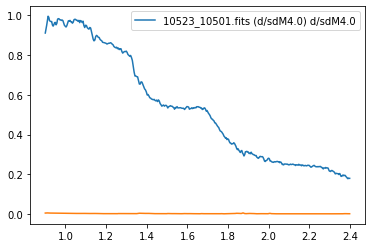

In [37]:
# access one of the spectra
wave = df['WAVE'].iloc[0]
ind = int(np.random.uniform(0,len(df)))
plt.plot(wave,df['FLUX'].iloc[ind])
plt.plot(wave,df['UNC'].iloc[ind])
plt.legend(['{} {}'.format(df['NAME'].iloc[ind],df['SPT'].iloc[ind])])


## test spectral functions

In [ ]:
# normalize
ind = int(np.random.uniform(0,len(df)))
wave = df['WAVE'].iloc[0]
flux = df['FLUX'].iloc[ind]
unc = df['UNC'].iloc[ind]

nflx,nunc = sb.normalize(wave,flux,unc,rng=[1.5,1.8])
plt.plot(wave,nflx)
plt.plot(wave,nunc)


In [ ]:
# uncertainty measurement
ind = int(np.random.uniform(0,len(df)))
wave = df['WAVE'].iloc[0]
flux = df['FLUX'].iloc[ind]
unc = df['UNC'].iloc[ind]

sb.measureSN(wave,flux,unc,rng=[1,2.2])


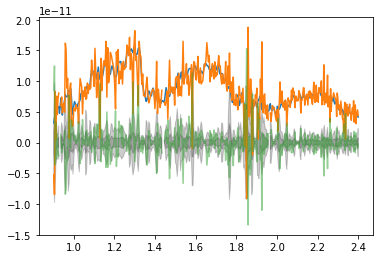

In [28]:
# add noise
ind = int(np.random.uniform(0,len(df)))
wave = df['WAVE'].iloc[0]
flux = df['FLUX'].iloc[ind]
unc = df['UNC'].iloc[ind]

scl = 3
nflux, nunc = sb.addNoise(wave,flux,unc,scl)
plt.plot(wave,flux)
plt.plot(wave,nflux)
plt.plot(wave,flux-nflux,alpha=0.5)
plt.fill_between(wave,nunc,-1.*nunc,color='k',alpha=0.2)
plt.fill_between(wave,unc,-1.*unc,color='k',alpha=0.2)


In [ ]:
# interpolation
ind = int(np.random.uniform(0,len(df)))
wave = df['WAVE'].iloc[0]
flux = df['FLUX'].iloc[ind]
unc = df['UNC'].iloc[ind]

wavenew = np.linspace(1.2,2.0,1000)
fluxnew = sb.interpolate_flux_wave(wave,flux,wavenew)

plt.plot(wave,flux)
plt.plot(wavenew,fluxnew)


In [ ]:
# classify
ind = int(np.random.uniform(0,len(df)))
wave = df['WAVE'].iloc[0]
flux = df['FLUX'].iloc[ind]
unc = df['UNC'].iloc[ind]

plt.plot(wave,flux)
spt = sb.fast_classify(wave,flux,unc)
sflux = sb.STANDARDS['FLUX'][list(sb.STANDARDS['SPT']).index(spt)]
plt.plot(wave,sflux*np.nanmedian(flux)/np.nanmedian(sflux))

In [31]:
# test speed of classification
t0 = time.perf_counter()
wave = df['WAVE'].iloc[0]
spts = []
for i in range(len(df)):
    flux = df['FLUX'].iloc[i]
    unc = df['UNC'].iloc[i]
    spts.append(sb.fast_classify(wave,flux,unc))
t1 = time.perf_counter()
print('total time = {:.2f} sec = {:.1f} msec per spectrum'.format(t1-t0,1000*(t1-t0)/len(df)))



total time = 9.22 sec = 5.2 msec per spectrum
